In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = \
train_test_split(fish_input, fish_target,  random_state=42)
from sklearn.preprocessing import StandardScaler as ss
ss = ss()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

array([[7.20000e+02, 3.50000e+01, 4.06000e+01, 1.63618e+01, 6.09000e+00],
       [5.00000e+02, 4.50000e+01, 4.80000e+01, 6.96000e+00, 4.89600e+00],
       [7.50000e+00, 1.05000e+01, 1.16000e+01, 1.97200e+00, 1.16000e+00],
       [1.10000e+02, 2.20000e+01, 2.35000e+01, 5.52250e+00, 3.99500e+00],
       [1.40000e+02, 2.07000e+01, 2.32000e+01, 8.53760e+00, 3.29440e+00],
       [6.90000e+01, 1.82000e+01, 2.03000e+01, 5.29830e+00, 2.82170e+00],
       [1.10000e+02, 2.10000e+01, 2.25000e+01, 5.69250e+00, 3.55500e+00],
       [6.20000e+02, 3.45000e+01, 3.97000e+01, 1.55227e+01, 5.28010e+00],
       [1.30000e+02, 2.13000e+01, 2.28000e+01, 6.38400e+00, 3.53400e+00],
       [8.50000e+01, 2.00000e+01, 2.10000e+01, 5.08200e+00, 2.77200e+00],
       [6.85000e+02, 3.65000e+01, 3.90000e+01, 1.08810e+01, 6.86400e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.14000e+02, 3.28000e+01, 3.40000e+01, 1.00300e+01, 6.01800e+00],
       [2.00000e+02, 2.30000e+01, 2.58

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = \
train_test_split(fish_input, fish_target,  random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
ss = ss()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_scaled, train_target)
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))
print(knn.predict(test_scaled[:5]))

0.8907563025210085
0.85
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = knn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


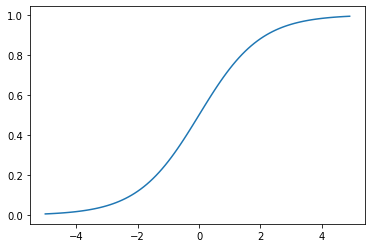

In [ ]:
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.show()

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression as lrr
lr = lrr()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
lr = lrr(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
